# Import libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

# EDA

In [3]:
df = pd.read_csv('bank.csv', delimiter=';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [10]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Inspect Target 

In [ ]:
df['y'].value_counts(), df['y'].value_counts(normalize=True)  

(y
 no     4000
 yes     521
 Name: count, dtype: int64,
 y
 no     0.88476
 yes    0.11524
 Name: proportion, dtype: float64)

<Axes: ylabel='count'>

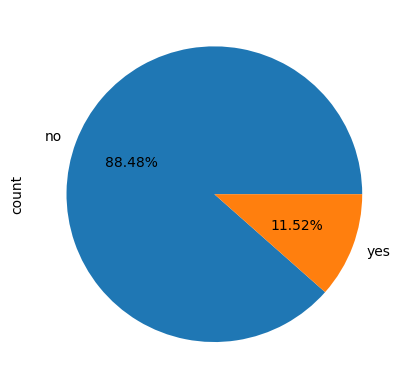

In [16]:
df['y'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [17]:
df['y'] = df['y'].apply(lambda x: 0 if x == 'no' else 1)

# Number 


<Axes: >

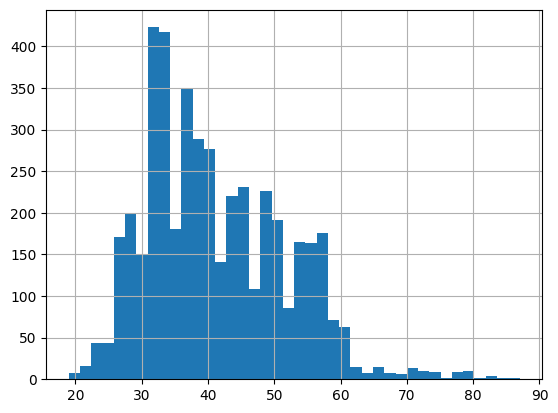

In [20]:
df['age'].hist(bins=40)

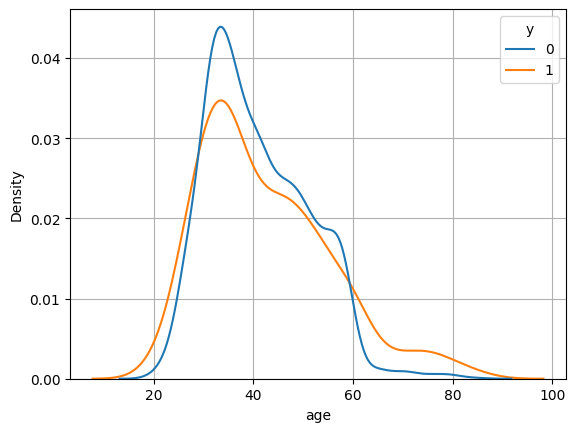

In [22]:
sns.kdeplot(df, x='age', hue='y', common_norm=False)
plt.grid()

In [26]:
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes(exclude='number').columns

In [28]:
num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
        'y'],
       dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome'],
       dtype='object'))

# Check Correlation   

<Axes: >

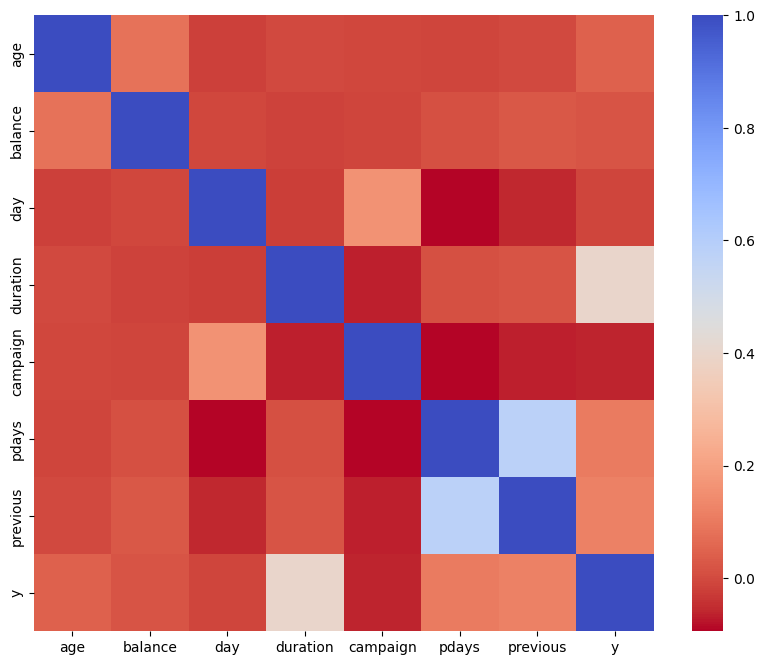

In [30]:
f, ax1 = plt.subplots(1, 1, figsize=(10,8))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap='coolwarm_r', ax=ax1)

In [35]:
corr['y'].sort_values()[::-1]

y           1.000000
duration    0.401118
previous    0.116714
pdays       0.104087
age         0.045092
balance     0.017905
day        -0.011244
campaign   -0.061147
Name: y, dtype: float64

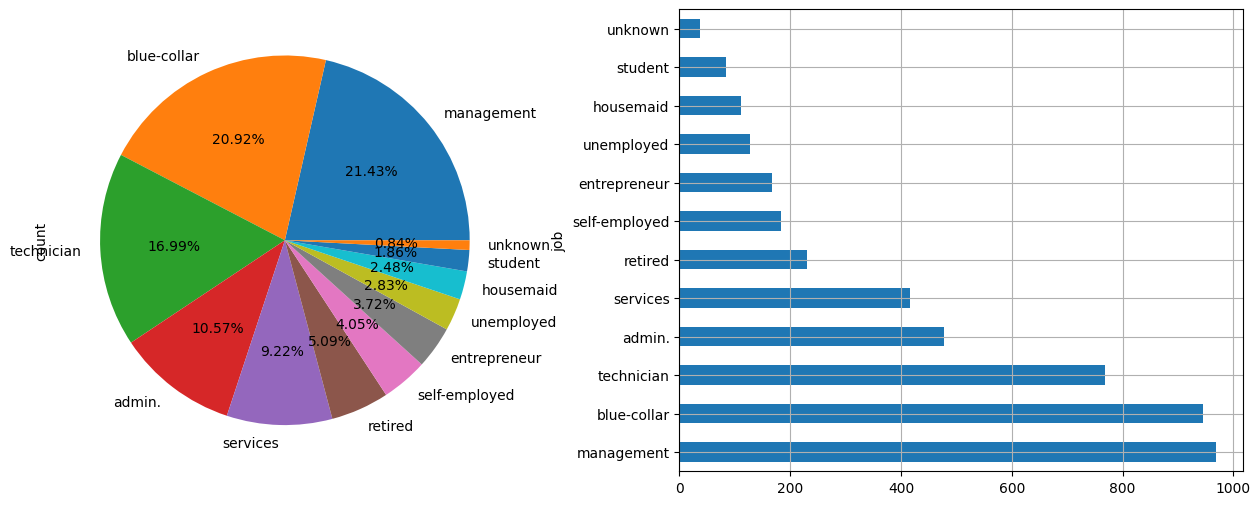

In [37]:
f, axs = plt.subplots(1, 2, figsize=(16, 6))
df['job'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axs[0])
df['job'].value_counts().plot(kind='barh', ax=axs[1])
plt.grid()
plt.show()

# Train Test Split   

In [38]:
train, test = train_test_split(df, test_size=0.3)

In [39]:
X_train, y_train = train.drop(columns=['y']), train['y']
X_test, y_test = test.drop(columns=['y']), test['y']

In [41]:
X_train.shape, y_train.shape

((3164, 16), (3164,))

In [ ]:
X_test.shape, y_test.shape  

((1357, 16), (1357,))

In [44]:
num_cols = num_cols.drop('y')

In [45]:
X_train = X_train[num_cols].values
X_test = X_test[num_cols].values
y_train = y_train.values
y_test = y_test.values

# Model: Logistic Regression 

In [49]:
model = LogisticRegression()
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [50]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Eluvation 

In [51]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [52]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], shape=(1357,))

In [54]:
y_prob

array([[0.93103855, 0.06896145],
       [0.79419035, 0.20580965],
       [0.25398174, 0.74601826],
       ...,
       [0.85820273, 0.14179727],
       [0.87326079, 0.12673921],
       [0.95579946, 0.04420054]], shape=(1357, 2))

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1198
           1       0.51      0.19      0.28       159

    accuracy                           0.88      1357
   macro avg       0.70      0.58      0.61      1357
weighted avg       0.86      0.88      0.86      1357



In [56]:
acc = accuracy_score(y_pred, y_test)
pre = precision_score(y_pred, y_test)
rec = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

In [57]:
print(f'Accuracy: {acc * 100:.2f}')
print(f'Precision: {pre * 100:.2f}, Recall: {rec*100:.2f}, F1 Score: {f1*100:.2f}')

Accuracy: 88.36
Precision: 19.50, Recall: 50.82, F1 Score: 28.18


In [60]:
con_mat = confusion_matrix(y_test, y_pred, labels=model.classes_)
tn, fp, fn, tp = con_mat.ravel()

In [61]:
tn, fp, tn, tp = con_mat.ravel()

In [62]:
tn, fp, fn, tp

(np.int64(128), np.int64(30), np.int64(128), np.int64(31))

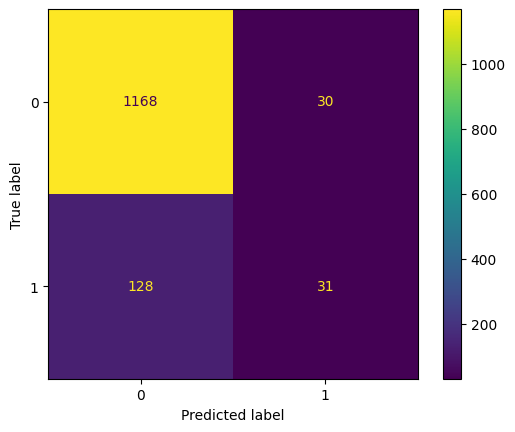

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=model.classes_)
disp.plot()